In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import missingno as msno
import warnings

In [ ]:
path=os.getcwd()
os.chdir('/content/drive/MyDrive/Colab Notebooks/datasets')

In [ ]:
df = pd.read_csv('piel.csv', sep=',', header=0)
df.head(5)

,Age At Procurement,Mutation Count,Mutation Status,Person Gender,Primary Tumor Site,Sample Type,Specimen Site,Tissue Source Site,Type
0,85.0,NaN,WT,Male,head/neck,primary,head/neck,Tumor,sun-exposed
1,NaN,288.0,NRAS-Q61R,Female,extremity,metastasis,extremity,Cell line,sun-exposed
2,65.0,155.0,BRAF-V600K,Male,head/neck,metastasis,trunk,Tumor,sun-exposed
3,68.0,1.0,WT,Male,head/neck,primary,head/neck,Tumor,sun-exposed
4,58.0,2.0,WT,Female,head/neck,primary,head/neck,Tumor,sun-exposed


In [ ]:
df.dtypes

Age At Procurement    float64
Mutation Count        float64
Mutation Status        object
Person Gender          object
Primary Tumor Site     object
Sample Type            object
Specimen Site          object
Tissue Source Site     object
Type                   object
dtype: object

<Axes: >

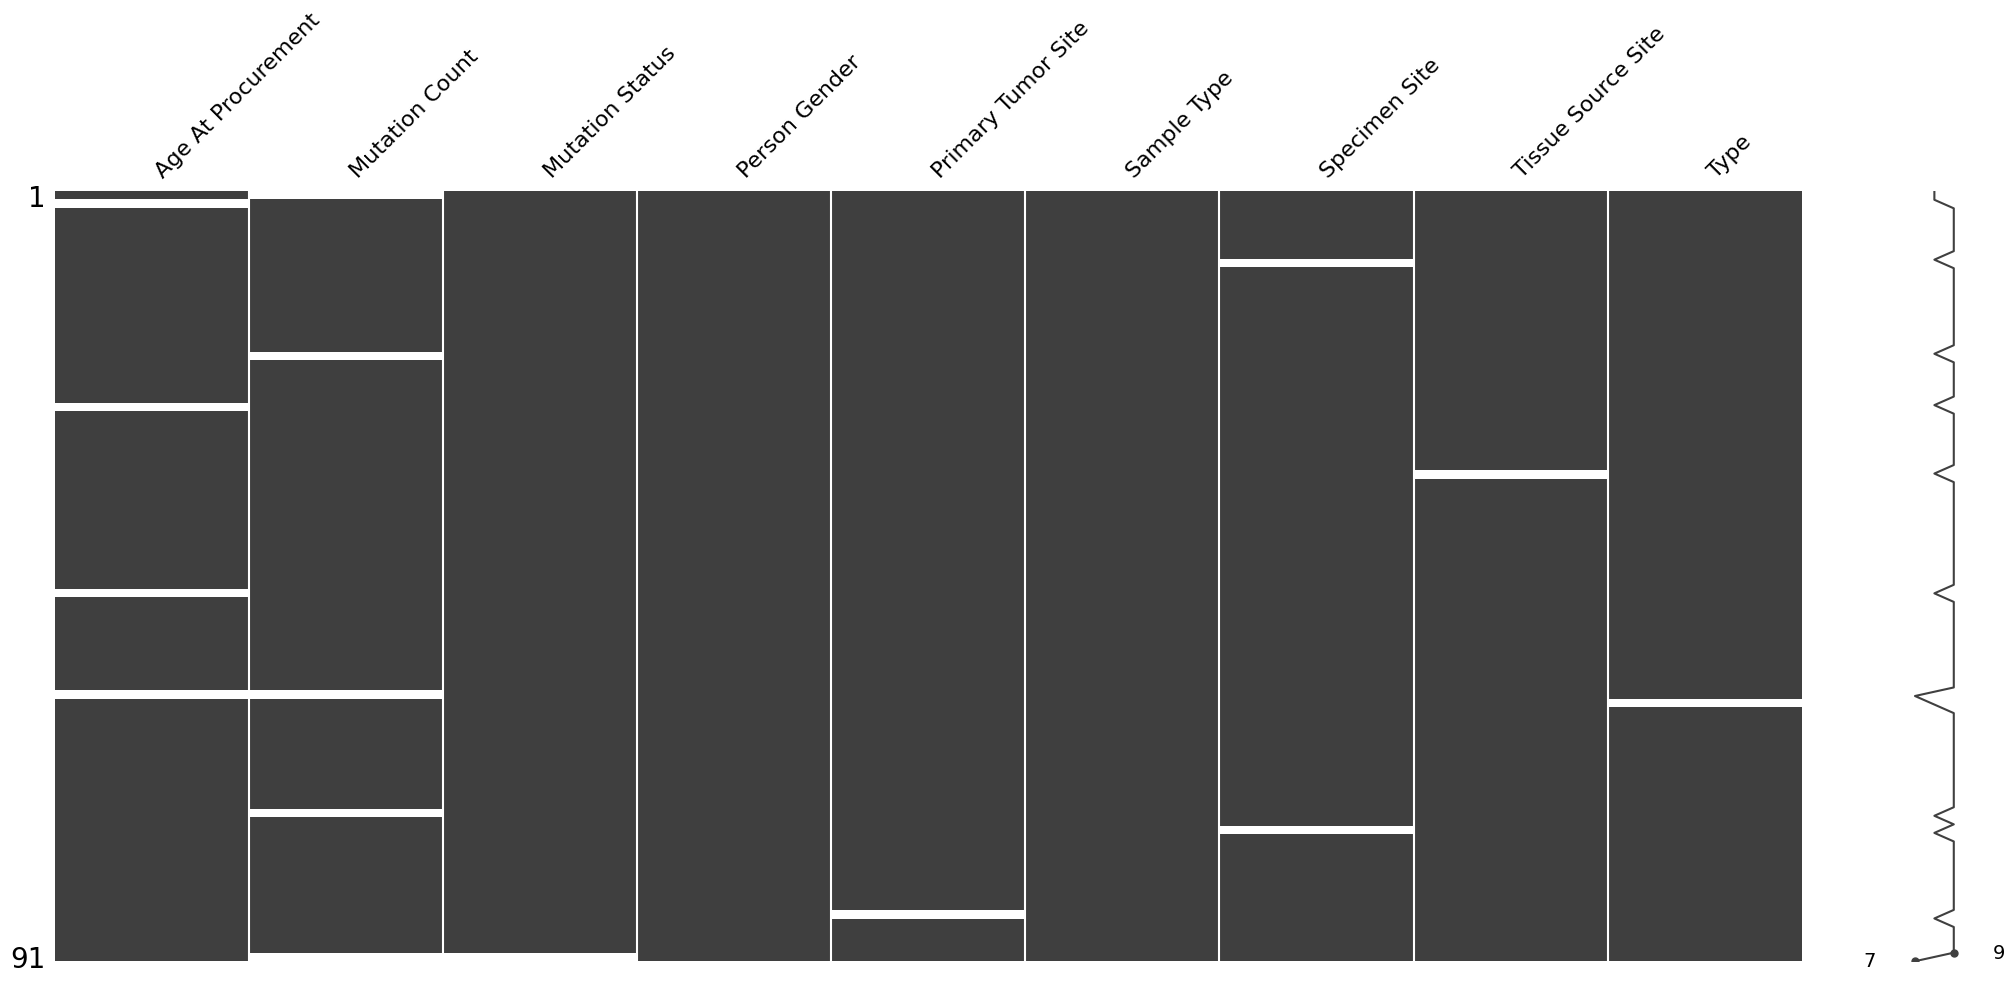

In [ ]:
msno.matrix(df)

In [ ]:
#Observar si existen nulos en el CSV
df.isna().sum()

Age At Procurement    4
Mutation Count        5
Mutation Status       1
Person Gender         0
Primary Tumor Site    1
Sample Type           0
Specimen Site         2
Tissue Source Site    1
Type                  1
dtype: int64

In [ ]:
# Eliminar filas con valores nulos en el DataFrame
df.dropna(inplace=True)

In [ ]:
#Observar si existen nulos en el CSV
df.isna().sum()

Age At Procurement    0
Mutation Count        0
Mutation Status       0
Person Gender         0
Primary Tumor Site    0
Sample Type           0
Specimen Site         0
Tissue Source Site    0
Type                  0
dtype: int64

In [ ]:
features = ['Age At Procurement','Mutation Count','Mutation Status','Person Gender','Primary Tumor Site', 'Sample Type', 'Specimen Site','Tissue Source Site']

label = 'Type'

## SVC

In [ ]:
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, accuracy_score, f1_score, confusion_matrix, classification_report

import seaborn as sns

In [21]:
#Convertir de texto a forma númerica
le = LabelEncoder()
y= le.fit_transform(df[label])

In [22]:
le2 = LabelEncoder()
df['Mutation Status'] = le2.fit_transform(df['Mutation Status'])

le3 = LabelEncoder()
df['Person Gender'] = le3.fit_transform(df['Person Gender'])

le4 = LabelEncoder()
df['Primary Tumor Site'] = le4.fit_transform(df['Primary Tumor Site'])

le5 = LabelEncoder()
df['Sample Type'] = le5.fit_transform(df['Sample Type'])

le6 = LabelEncoder()
df['Specimen Site'] = le6.fit_transform(df['Specimen Site'])

le7 = LabelEncoder()
df['Tissue Source Site'] = le7.fit_transform(df['Tissue Source Site'])

In [23]:
xtrain, xtest, ytrain, ytest = train_test_split(df[features], y , test_size=0.20, random_state=0)

In [24]:
xtrain.shape

(62, 8)

In [25]:
xtest.shape

(16, 8)

In [26]:
len(ytrain)

62

In [27]:
len(ytest)

16

In [28]:
svm = SVC (probability=True)
modelo = svm.fit(xtrain,ytrain)
prediccion = modelo.predict(xtest)

In [29]:
prediccion_lista = prediccion.tolist()
ytest_lista = ytest.tolist()

i = 0
for pred in prediccion_lista:
  print(pred, '-> ', ytest[i])

  i +=1

2 ->  2
2 ->  0
2 ->  0
2 ->  2
2 ->  2
2 ->  2
2 ->  4
2 ->  2
2 ->  1
2 ->  2
2 ->  2
2 ->  0
2 ->  2
2 ->  2
2 ->  2
2 ->  2


In [30]:
print('score:',modelo.score(xtest,ytest))

score: 0.6875


sun-exposed    50
acral          10
unknown        10
uveal           4
mucosal         4
Name: Type, dtype: int64
score: 0.6875
recall_score: 0.6875
accuracy_score 0.6875
f1_score 0.6875
classification_report               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       1.00      0.69      0.81        16
           4       0.00      0.00      0.00         0

    accuracy                           0.69        16
   macro avg       0.25      0.17      0.20        16
weighted avg       1.00      0.69      0.81        16



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

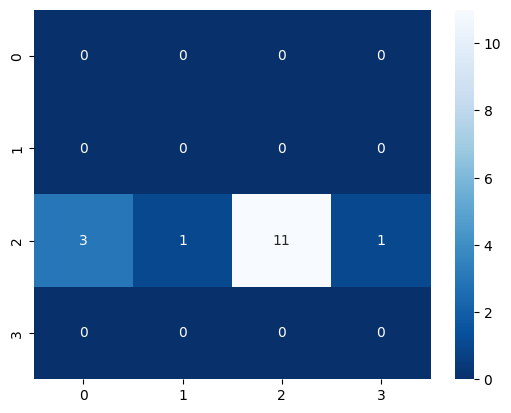

In [31]:
print(df['Type'].value_counts())

print('score:', modelo.score(xtest,ytest))
print('recall_score:', recall_score(prediccion, ytest, average='micro'))
print('accuracy_score', accuracy_score(prediccion, ytest))
print('f1_score', f1_score(prediccion, ytest, average='micro'))

print('classification_report',classification_report(prediccion, ytest))
cf=confusion_matrix(prediccion, ytest)
sns.heatmap(cf, annot=True, cmap='Blues_r')

# DecisionTreeClassifier

In [32]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from IPython.display import Image
import pydotplus

In [33]:
svm = DecisionTreeClassifier (max_depth=5)
modelo = svm.fit(xtrain,ytrain)
prediccion = modelo.predict(xtest)

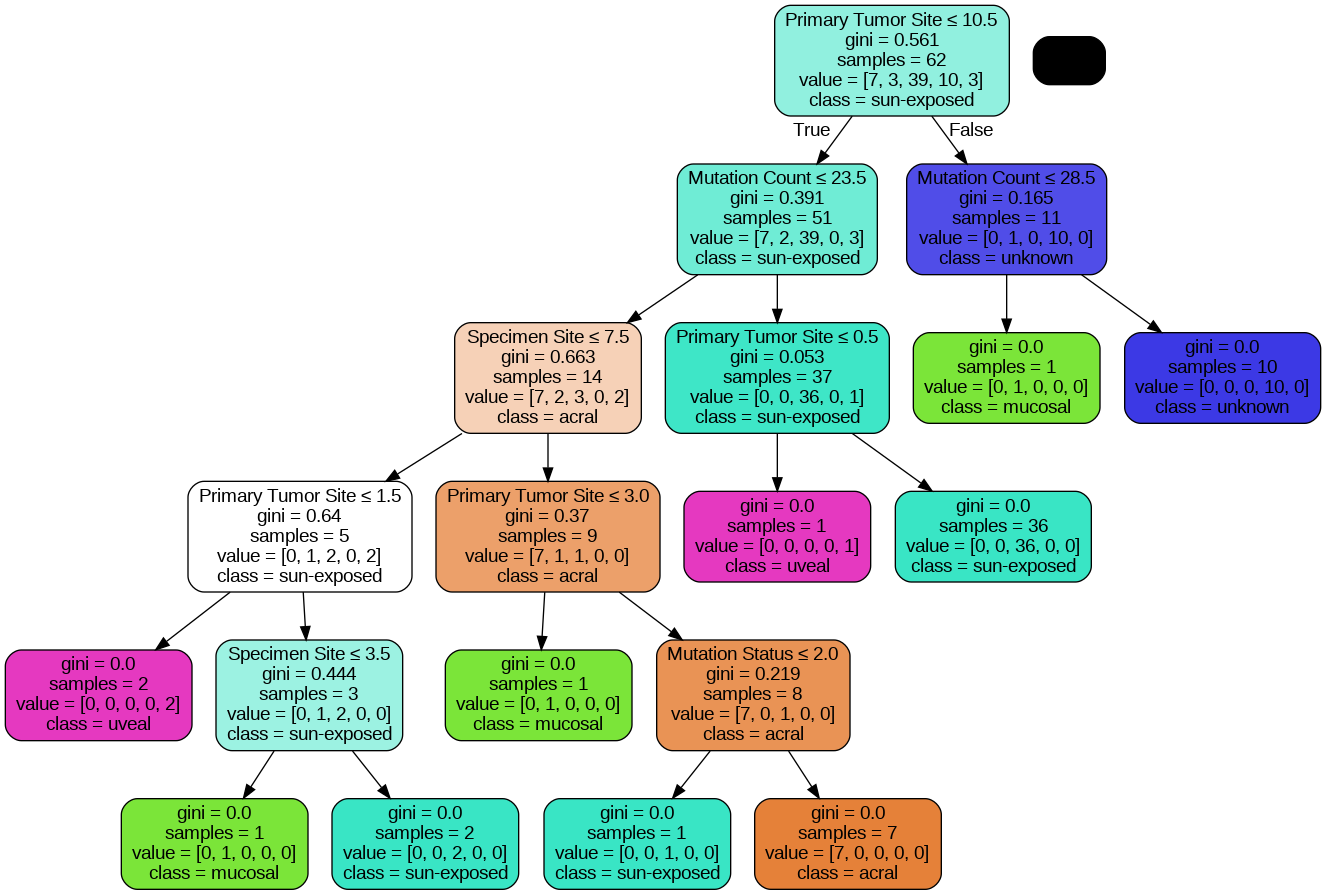

In [35]:
# Visualizar el árbol en formato Graphviz
dot_data = export_graphviz(modelo, out_file=None,
                           feature_names=features,
                           class_names=le.classes_,
                           filled=True, rounded=True,
                           special_characters=True)


graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

In [37]:
prediccion_lista = prediccion.tolist()
ytest_lista=ytest.tolist()
i=0

for p in prediccion_lista:
    print(p, '->', ytest_lista[i])
    i += 1

2 -> 2
1 -> 0
0 -> 0
2 -> 2
2 -> 2
2 -> 2
1 -> 4
2 -> 2
2 -> 1
2 -> 2
2 -> 2
2 -> 0
2 -> 2
2 -> 2
2 -> 2
3 -> 2


sun-exposed    50
acral          10
unknown        10
uveal           4
mucosal         4
Name: Type, dtype: int64
score: 0.6875
recall_score: 0.6875
accuracy_score 0.6875
f1_score 0.6875
classification_report               precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.00      0.00      0.00         2
           2       0.91      0.83      0.87        12
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         0

    accuracy                           0.69        16
   macro avg       0.25      0.37      0.27        16
weighted avg       0.70      0.69      0.68        16



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

<Axes: >

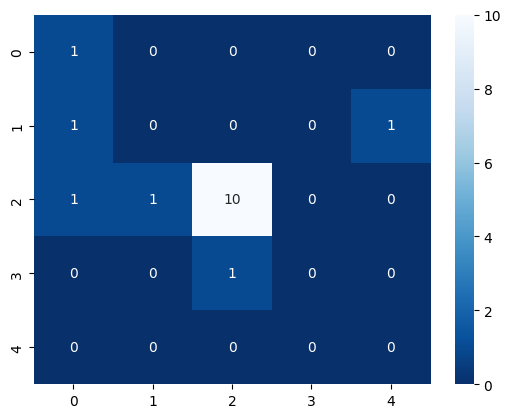

In [36]:
print(df['Type'].value_counts())

print('score:', modelo.score(xtest,ytest))
print('recall_score:', recall_score(prediccion, ytest, average='micro'))
print('accuracy_score', accuracy_score(prediccion, ytest))
print('f1_score', f1_score(prediccion, ytest, average='micro'))

print('classification_report',classification_report(prediccion, ytest))
cf=confusion_matrix(prediccion, ytest)
sns.heatmap(cf, annot=True, cmap='Blues_r')

## GradientBoostingClassifier

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

In [39]:
svm = GradientBoostingClassifier ()
modelo = svm.fit(xtrain,ytrain)
prediccion = modelo.predict(xtest)

sun-exposed    50
acral          10
unknown        10
uveal           4
mucosal         4
Name: Type, dtype: int64
score: 0.75
recall_score: 0.75
accuracy_score 0.75
f1_score 0.75
classification_report               precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.00      0.00      0.00         0
           2       0.91      0.77      0.83        13
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         1

    accuracy                           0.75        16
   macro avg       0.45      0.55      0.47        16
weighted avg       0.82      0.75      0.77        16



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

<Axes: >

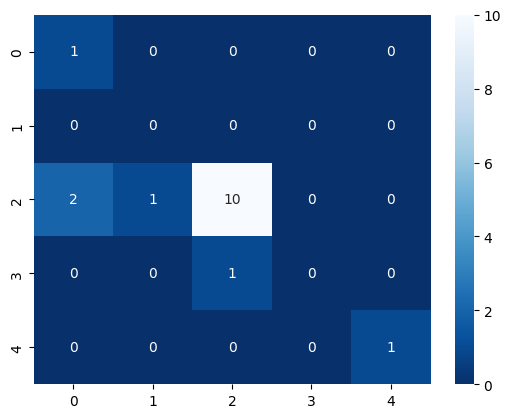

In [40]:
print(df['Type'].value_counts())

print('score:', modelo.score(xtest,ytest))
print('recall_score:', recall_score(prediccion, ytest, average='micro'))
print('accuracy_score', accuracy_score(prediccion, ytest))
print('f1_score', f1_score(prediccion, ytest, average='micro'))

print('classification_report',classification_report(prediccion, ytest))
cf=confusion_matrix(prediccion, ytest)
sns.heatmap(cf, annot=True, cmap='Blues_r')